<a href="https://colab.research.google.com/github/HanifFaishalH/MachineLearning/blob/main/UTS_2341720116_Hanif_Faishal_Hilmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS

## Nama     : Hanif Faishal Hilmi

## Kelas     : TI-3F

## NIM     : 2341720116

# Studi Kasus 3 - Heart Diseases

- Studi kasus ini tentang ciri penyakit liver.
- Untuk mahasiswa dengan no absen 3, 6, 9, 12, dst
- Lakukan beberapa tahapan berikut dan lakukan proses analisis terhadap hasil yang dihasilkan.

## Pra Pengolahan Data (10 poin)

1. Load data (0 poin)
2. Cek deskripsi data apakah menggandung nilai yang hilang. Jika ya, sebutkan berapa dan pada fitur yang mana. (5 poin)
3. Drop fitur yang tidak relevan untuk proses clustering. (5 poin)

## Feature Selection (20 poin)

1. Pilih 5 variabel terbaik menurut Anda dari seluruh variabel yang ada. (10 poin)
2. Bagaimana cara Anda memilih 5 variabel tersebut? Kemukakan alasan Anda. (10 poin)

## Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)
2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)
3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

NB: Anda diperbolehkan untuk melakukan proses normalisasi/standardisasi sebelum pembuatan model clustering. Lakukan pengamatan terhadap hasil clustering.

## Clustering - 2 (20 poin)

1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)
2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

## Feature Selection 2 (30 poin)
Setelah mengetahui performa hasil clustering pada model KMeans dan DBSCAN berdasakan silhouette coefficient dan DBI, lakukan proses feature selection untuk meningkatkan nilai silhouette coefficient dan DBI. Anda diperbolehkan untuk menggunakan metode iterative process atau metode yang lain.

1. Fitur apa yang memberikan nilai silhouette coefficient/DBI terbaik? Lengkapi dengan proses pemilihan fitur
2. Mengapa Anda menggunakan metode pemilihan fitur tersebut?


## BONUS - CHALLENGE (30 poin)
Buatlah model ANNOY menggunakan data yang telah melalui proses pra pengolahan data. Lakukan query dengan 5 nilai terdekat. Apakah ANNOY melakukan query pada cluster terbaik yang telah Anda bentuk?

# Jawab

## Pra Pengolahan Data (10 poin)

1. Load data (0 poin)
2. Cek deskripsi data apakah menggandung nilai yang hilang. Jika ya, sebutkan berapa dan pada fitur yang mana. (5 poin)
4. Drop fitur yang tidak relevan untuk proses clustering. (5 poin)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/3_heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


2. Cek deskripsi data apakah menggandung nilai yang hilang. Jika ya, sebutkan berapa dan pada fitur yang mana.
3. Drop fitur yang tidak relevan untuk proses clustering. (5 poin)

In [3]:
# Cek nilai hilang

missing_values = data.isnull().sum()
print(missing_values)
print(f"Total missing: {missing_values.sum()}")

# tidak ada data yang kosong

X = data.drop(columns=['target'])

data.info()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Total missing: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage:

## Feature Selection (20 poin)

1. Pilih 5 variabel terbaik menurut Anda dari seluruh variabel yang ada. (10 poin)
2. Bagaimana cara Anda memilih 5 variabel tersebut? Kemukakan alasan Anda. (10 poin)

1. Memilih 5 variabel terbaik

In [4]:
# mencari 5 variabel terbaik menggunakan variance
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit(X)
variances = selector.variances_
feature_variance = pd.DataFrame({
    'feature': X.columns,
    'variance': variances
}).sort_values('variance', ascending=False)

print("Ranking fitur berdasarkan variance:")
print(feature_variance)

# memilih 5 fitur dengan variasi tertinggi
top5_features = feature_variance.head(5)['feature'].tolist()
print(top5_features)

Ranking fitur berdasarkan variance:
     feature    variance
4       chol  438.000000
7    thalach  131.000000
3   trestbps  106.000000
0        age   48.000000
9    oldpeak    1.379403
11        ca    1.061507
2         cp    1.059126
12      thal    0.384843
10     slope    0.381249
6    restecg    0.278383
8      exang    0.223296
1        sex    0.211737
5        fbs    0.126987
['chol', 'thalach', 'trestbps', 'age', 'oldpeak']


2. Cara pemilihan

Cara menentukan 5 variabel terbaik adalah menggunakan Variance Threshold, yaitu mengukur varian nilai yang tersebar dalam suatu fitur. Cara kerjanya yaitu tiap fitur dihitung variannya, kemudian diubah ke dalam array, dilakukan perankingan, dan diambil 5 fitur dengan varian terbesar.

## Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)
2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)
3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

NB: Anda diperbolehkan untuk melakukan proses normalisasi/standardisasi sebelum pembuatan model clustering. Lakukan pengamatan terhadap hasil clustering.

In [5]:
from sklearn.preprocessing import StandardScaler

# mengambil 5 fitur terbaik
final_features = top5_features
X = data[final_features]

print(X.head())

# normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_data = pd.DataFrame(X_scaled, columns=final_features)
print("Data setelah standardisasi:")
print(X_scaled_data.head())

   chol  thalach  trestbps  age  oldpeak
0   212      168       125   52      1.0
1   203      155       140   53      3.1
2   174      125       145   70      2.6
3   203      161       148   61      0.0
4   294      106       138   62      1.9
Data setelah standardisasi:
       chol   thalach  trestbps       age   oldpeak
0 -0.659332  0.821321 -0.377636 -0.268437 -0.060888
1 -0.833861  0.255968  0.479107 -0.158157  1.727137
2 -1.396233 -1.048692  0.764688  1.716595  1.301417
3 -0.833861  0.516900  0.936037  0.724079 -0.912329
4  0.930822 -1.874977  0.364875  0.834359  0.705408


1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# membuat model cluster dengan jumlah 1-10
sse = []
silhouette_scores = [] # Renamed the list to avoid conflict
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sse.append(kmeans.inertia_)

2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)

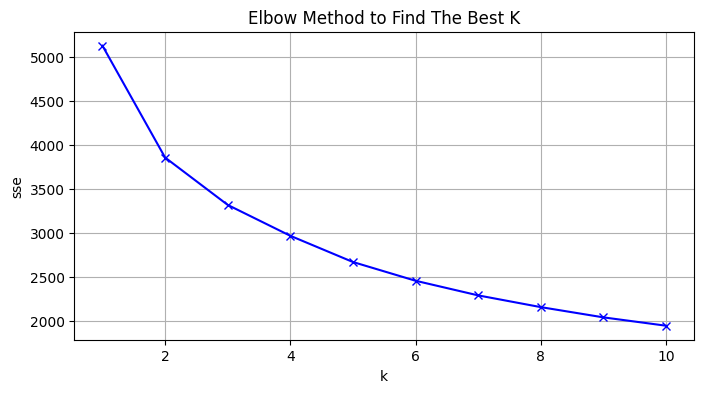

1→2	3857.35		1267.65		24.7%	← PENURUNAN MULAI MELAMBAT
2→3	3319.88		537.47		13.9%	← PENURUNAN TIDAK SIGNIFIKAN
3→4	2969.63		350.26		10.6%	← PENURUNAN TIDAK SIGNIFIKAN
4→5	2672.39		297.23		10.0%	← PENURUNAN TIDAK SIGNIFIKAN
5→6	2459.82		212.57		8.0%	← PENURUNAN TIDAK SIGNIFIKAN
6→7	2293.92		165.90		6.7%	← PENURUNAN TIDAK SIGNIFIKAN
7→8	2160.86		133.06		5.8%	← PENURUNAN TIDAK SIGNIFIKAN
8→9	2044.75		116.12		5.4%	← PENURUNAN TIDAK SIGNIFIKAN
9→10	1950.09		94.66		4.6%	← PENURUNAN TIDAK SIGNIFIKAN


In [7]:
# Visualisasi diagram elbow
plt.figure(figsize=(8,4))
plt.plot(k_range, sse, "bx-")
plt.xlabel("k")
plt.ylabel("sse")
plt.title("Elbow Method to Find The Best K")
plt.grid(True)
plt.show()

# Analisis penurunan nilai SSE
for i in range(1, len(sse)):
    reduction = sse[i-1] - sse[i]
    reduction_pct = (reduction / sse[i-1]) * 100

    # Tandai di mana penurunan mulai tidak signifikan
    if reduction_pct < 15:
        indicator = "← PENURUNAN TIDAK SIGNIFIKAN"
    elif reduction_pct < 25:
        indicator = "← PENURUNAN MULAI MELAMBAT"
    else:
        indicator = ""

    print(f"{i}→{i+1}\t{sse[i]:.2f}\t\t{reduction:.2f}\t\t{reduction_pct:.1f}%\t{indicator}")



Dari model KMeans yang kemudian menggunakan metode elbow, nilai k optimal untuk dataset ini adalah 2. Hal ini dapat dibuktikan dari penurunan nilai SSE tidak signifikan dimulai dari titik ke-2.

3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# membuat model cluster dengan jumlah 1-10
sse = []
silhouette_scores = [] # Renamed the list to avoid conflict
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sse.append(kmeans.inertia_)

    # mencari nilai silhouette
    if k > 1:
        sil_score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(sil_score)
        print(f"k={k}: Silhouette Score = {sil_score:.4f}")
    else:
        silhouette_scores.append(0)  # Tidak terdefinisi untuk k=1
        print(f"k={k}: Silhouette Score = Tidak terdefinisi")

k=1: Silhouette Score = Tidak terdefinisi
k=2: Silhouette Score = 0.2423
k=3: Silhouette Score = 0.2294
k=4: Silhouette Score = 0.2012
k=5: Silhouette Score = 0.2156
k=6: Silhouette Score = 0.2050
k=7: Silhouette Score = 0.1956
k=8: Silhouette Score = 0.1865
k=9: Silhouette Score = 0.1928
k=10: Silhouette Score = 0.1927


Jika menggunakan nilai Silhouette Score, nilai k terbaik adalah ketika k=2.

Setelah melakukan perhitungan menggunakan metode elbow dan nilai Silhouette, terdapat kesamaan nilai k optimal diantara kedua metode ini yaitu k=2.

**Model Final KMeans**

In [26]:
optimal_k = 2

# Model final KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = kmeans.fit_predict(X_scaled)

## Clustering - 2 (20 poin)

1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)
2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

In [30]:
# pembuatan model cluster dengan DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# membuat model DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# menghitung jumlah cluster
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah cluster: {n_clusters}")
print(f"Jumlah outlier: {n_noise}")

# menghitung metrik dengan menggunakan data non-noise
non_noise_mask = labels != -1
if len(set(labels[non_noise_mask])) > 1:
  X_non_noise = X_scaled[non_noise_mask]
  labels_non_noise = labels[non_noise_mask]

  sil_score = silhouette_score(X_non_noise, labels_non_noise)
  dbi_score = davies_bouldin_score(X_non_noise, labels_non_noise)

  print(f"Silhouette Score: {sil_score}")
  print(f"DBI Score: {dbi_score}")

Jumlah cluster: 25
Jumlah outlier: 803
Silhouette Score: 0.6343003284148981
DBI Score: 0.569257344668017


**Model DBSCAN**

In [31]:
print("=== MODEL DBSCAN SUDAH TERBENTUK ===")
print(f"✓ Parameter: eps={dbscan.eps}, min_samples={dbscan.min_samples}")
print(f"✓ Jumlah cluster: {n_clusters}")
print(f"✓ Jumlah noise: {n_noise}")
print(f"✓ Core samples: {len(dbscan.core_sample_indices_)}")
print(f"✓ Labels: {len(labels)} data points")

# Distribusi cluster detail
print(f"\n=== DISTRIBUSI DETAIL ===")
unique, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique, counts):
    if label == -1:
        print(f"  Noise: {count} points")
    else:
        print(f"  Cluster {label}: {count} points")

=== MODEL DBSCAN SUDAH TERBENTUK ===
✓ Parameter: eps=0.5, min_samples=5
✓ Jumlah cluster: 25
✓ Jumlah noise: 803
✓ Core samples: 222
✓ Labels: 1025 data points

=== DISTRIBUSI DETAIL ===
  Noise: 803 points
  Cluster 0: 10 points
  Cluster 1: 14 points
  Cluster 2: 14 points
  Cluster 3: 7 points
  Cluster 4: 21 points
  Cluster 5: 8 points
  Cluster 6: 6 points
  Cluster 7: 8 points
  Cluster 8: 10 points
  Cluster 9: 21 points
  Cluster 10: 6 points
  Cluster 11: 6 points
  Cluster 12: 7 points
  Cluster 13: 6 points
  Cluster 14: 15 points
  Cluster 15: 7 points
  Cluster 16: 6 points
  Cluster 17: 6 points
  Cluster 18: 7 points
  Cluster 19: 6 points
  Cluster 20: 6 points
  Cluster 21: 6 points
  Cluster 22: 7 points
  Cluster 23: 6 points
  Cluster 24: 6 points


## BONUS - CHALLENGE (30 poin)
Buatlah model ANNOY menggunakan data yang telah melalui proses pra pengolahan data. Lakukan query dengan 5 nilai terdekat. Apakah ANNOY melakukan query pada cluster terbaik yang telah Anda bentuk?

In [33]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=87facea31a5e41faccb503e6ab0a472e0a379d0008b869da2b15db9e9e164582
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [41]:
from annoy import AnnoyIndex

# persiapan data menggunakan 5 fitur terbaik
n_features = X_scaled.shape[1] # mengambil 5 fitur terbaik
n_trees = 50

# membuat ANNOY index
annoy_index = AnnoyIndex(n_features, 'euclidean')

# menambah semua data points ke index
for i, vector in enumerate(X_scaled):
    annoy_index.add_item(i, vector)

# membuat index dengan n trees
annoy_index.build(n_trees)
print(f"ANNOY index built with {n_trees} trees")

# Test query
print("\n=== TEST QUERY ===")
query_idx = 0  # Data point pertama
actual_cluster = final_labels[query_idx]

print(f"Query point {query_idx} - Actual cluster: {actual_cluster}")

# Get 5 nearest neighbors
neighbors, distances = annoy_index.get_nns_by_item(query_idx, 6, include_distances=True)
neighbors = neighbors[1:]  # Exclude self
distances = distances[1:]

print("5 Nearest Neighbors:")
for i, (neighbor, dist) in enumerate(zip(neighbors, distances)):
    neighbor_cluster = final_labels[neighbor]
    match = "✓ SAME" if neighbor_cluster == actual_cluster else "✗ DIFFERENT"
    print(f"  {i+1}. Point {neighbor} (Cluster {neighbor_cluster}) - Dist: {dist:.3f} {match}")

# Hitung akurasi
matches = sum(1 for n in neighbors if final_labels[n] == actual_cluster)
accuracy = matches / len(neighbors) * 100
print(f"Cluster matching accuracy: {accuracy:.1f}%")


ANNOY index built with 50 trees

=== TEST QUERY ===
Query point 0 - Actual cluster: 1
5 Nearest Neighbors:
  1. Point 634 (Cluster 1) - Dist: 0.000 ✓ SAME
  2. Point 671 (Cluster 1) - Dist: 0.000 ✓ SAME
  3. Point 863 (Cluster 1) - Dist: 0.000 ✓ SAME
  4. Point 14 (Cluster 1) - Dist: 0.571 ✓ SAME
  5. Point 686 (Cluster 1) - Dist: 0.571 ✓ SAME
Cluster matching accuracy: 100.0%


Ya, ANNOY melakukan query pada cluster terbaik yang telah dibuat.